## AÇIKLAMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/Acer/Desktop/Veri Seti/tcmb_aylik_veriler.csv')
print(df.head())

    Tarih  tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
0  2020-1                  14.606                 9.3120   
1  2020-2                  13.835                 8.9775   
2  2020-3                  14.040                 8.9725   
3  2020-4                  12.065                 8.7625   
4  2020-5                  10.682                 7.3260   

   3_aylik_mevduat_faizi  usd_mevduat_faizi  eur_mevduat_faizi  \
0                10.2000             1.3680             0.1680   
1                 9.8775             1.1675             0.1425   
2                10.0850             0.9550             0.1300   
3                10.0575             1.0950             0.1725   
4                 8.3060             0.7540             0.1820   

   tuketici_fiyat_endeksi  ito_gecinme_endeksi  reel_kesim_guven_endeksi  \
0                  446.45              22278.1                     104.1   
1                  448.02              22530.4                     106.9   
2             

In [6]:
df.tail()

,Tarih,tuketici_kredisi_faizi,1_aylik_mevduat_faizi,3_aylik_mevduat_faizi,usd_mevduat_faizi,eur_mevduat_faizi,tuketici_fiyat_endeksi,ito_gecinme_endeksi,reel_kesim_guven_endeksi,istihdam_orani,issizlik_orani,konut_fiyat_endeksi,toplam_sifir_konut_satisi,toplam_ikinciel_konut_satisi,resmi_rezerv_varliklari,toplam_binek_otomobil_uretimi,usd_try,eur_try,gbp_try
56,2024-9,68.5375,54.4200,59.6775,1.2900,0.7750,2526.16,163921.5,98.8,50.1,8.6,NaN,44858.0,96061.0,152067.0,85573.0,33.969271,37.715176,44.781886
57,2024-10,66.9425,54.6200,59.4975,1.2825,0.8175,2598.91,169895.3,100.9,49.9,8.5,NaN,57679.0,107459.0,159821.0,85155.0,34.171018,37.333555,44.626227
58,2024-11,65.9380,54.7140,59.0740,1.2540,0.7960,2657.23,175104.1,100.4,49.7,8.4,NaN,49274.0,103740.0,157738.0,80058.0,34.364714,36.572629,43.770176
59,2024-12,65.0650,54.7075,59.3325,1.2900,0.7775,2684.55,178157.5,99.1,NaN,NaN,NaN,76629.0,136008.0,155156.0,82152.0,34.903823,36.577014,44.084645
60,2025-1,66.3200,52.9575,55.2625,1.5775,0.9400,NaN,NaN,100.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.455959,36.716768,43.719450


In [8]:
def check_df(df):
    print(df.info())
    print('**********')
    print(df.describe().T)
    print('**********')
    print(df.isnull().sum())
    print('**********')
    print(df.shape)
    print('**********')
    print(df.size)
    print('**********')
    print(df.nunique())
    print('**********')


check_df(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tarih                          61 non-null     object 
 1   tuketici_kredisi_faizi         61 non-null     float64
 2   1_aylik_mevduat_faizi          61 non-null     float64
 3   3_aylik_mevduat_faizi          61 non-null     float64
 4   usd_mevduat_faizi              61 non-null     float64
 5   eur_mevduat_faizi              61 non-null     float64
 6   tuketici_fiyat_endeksi         60 non-null     float64
 7   ito_gecinme_endeksi            60 non-null     float64
 8   reel_kesim_guven_endeksi       61 non-null     float64
 9   istihdam_orani                 59 non-null     float64
 10  issizlik_orani                 59 non-null     float64
 11  konut_fiyat_endeksi            53 non-null     float64
 12  toplam_sifir_konut_satisi      60 non-null     float

In [10]:
print(df.columns)

Index(['Tarih', 'tuketici_kredisi_faizi', '1_aylik_mevduat_faizi',
       '3_aylik_mevduat_faizi', 'usd_mevduat_faizi', 'eur_mevduat_faizi',
       'tuketici_fiyat_endeksi', 'ito_gecinme_endeksi',
       'reel_kesim_guven_endeksi', 'istihdam_orani', 'issizlik_orani',
       'konut_fiyat_endeksi', 'toplam_sifir_konut_satisi',
       'toplam_ikinciel_konut_satisi', 'resmi_rezerv_varliklari',
       'toplam_binek_otomobil_uretimi', 'usd_try', 'eur_try', 'gbp_try'],
      dtype='object')


In [52]:
# Rastgele veri üretimi için sabitleme
np.random.seed(42)

# Tarih aralığı (Son 24 ay)
dates = pd.date_range(start="2023-01-01", periods=24, freq='M')

# Ekonomik göstergeler için rastgele veri simülasyonu
data = {
    "Tarih": dates,
    "tuketici_kredisi_faizi": np.random.uniform(15, 25, len(dates)),  # %15 - %25 arasında
    "1_aylik_mevduat_faizi": np.random.uniform(10, 20, len(dates)),
    "3_aylik_mevduat_faizi": np.random.uniform(12, 22, len(dates)),
    "usd_mevduat_faizi": np.random.uniform(1, 5, len(dates)),
    "eur_mevduat_faizi": np.random.uniform(0.5, 4, len(dates)),
    "tuketici_fiyat_endeksi": np.random.uniform(200, 400, len(dates)),
    "ito_gecinme_endeksi": np.random.uniform(150, 300, len(dates)),
    "reel_kesim_guven_endeksi": np.random.uniform(90, 120, len(dates)),
    "istihdam_orani": np.random.uniform(40, 55, len(dates)),
    "issizlik_orani": np.random.uniform(8, 15, len(dates)),
    "konut_fiyat_endeksi": np.random.uniform(300, 600, len(dates)),
    "toplam_sifir_konut_satisi": np.random.randint(5000, 15000, len(dates)),
    "toplam_ikinciel_konut_satisi": np.random.randint(10000, 30000, len(dates)),
    "resmi_rezerv_varliklari": np.random.uniform(50, 100, len(dates)),
    "toplam_binek_otomobil_uretimi": np.random.randint(10000, 50000, len(dates)),
    "usd_try": np.random.uniform(18, 30, len(dates)),
    "eur_try": np.random.uniform(20, 32, len(dates)),
    "gbp_try": np.random.uniform(22, 35, len(dates))
}

# DataFrame oluşturulması
df = pd.DataFrame(data)
df.head()


,Tarih,tuketici_kredisi_faizi,1_aylik_mevduat_faizi,3_aylik_mevduat_faizi,usd_mevduat_faizi,eur_mevduat_faizi,tuketici_fiyat_endeksi,ito_gecinme_endeksi,reel_kesim_guven_endeksi,istihdam_orani,issizlik_orani,konut_fiyat_endeksi,toplam_sifir_konut_satisi,toplam_ikinciel_konut_satisi,resmi_rezerv_varliklari,toplam_binek_otomobil_uretimi,usd_try,eur_try,gbp_try
0,2023-01-31,18.745401,14.560700,17.467103,1.022088,2.329565,361.488031,192.726074,91.223254,53.506271,10.277798,582.137575,6409,23403,75.815017,11679,29.201236,24.038651,30.837982
1,2023-02-28,24.507143,17.851760,13.848545,4.261846,1.996394,379.218260,155.533042,107.726788,49.496522,13.225440,586.178573,5784,23121,66.147824,13506,24.012479,27.868672,31.618814
2,2023-03-31,22.319939,11.996738,21.695846,3.827429,0.588967,263.600695,241.434650,110.326931,45.085447,12.547430,574.459317,13096,20966,89.759310,23284,24.472529,24.624759,25.097070
3,2023-04-30,20.986585,15.142344,19.751328,3.916029,0.877620,222.010385,225.401853,90.497635,45.238144,13.944564,411.047610,12560,10853,63.541613,17253,26.207565,28.179364,26.910476
4,2023-05-31,16.560186,15.924146,21.394989,4.085081,0.610002,245.587033,157.721813,105.362792,50.889335,12.603290,304.636985,12343,26958,71.948571,29128,25.390214,24.087495,28.946257


In [70]:
# DataFrame oluşturulması
df = pd.DataFrame(data)

In [72]:
# Korelasyon matrisini hesaplama
correlation_matrix = df.corr()

In [74]:
# Temel istatistiksel bilgileri alma
summary_stats = df.describe()

In [76]:
# Verilen her sütun için maksimum ve minimum değerleri yazdırma
def print_min_max(df):
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # sadece sayısal veriler
            print(f"{column} - Min: {df[column].min()} | Max: {df[column].max()}")
    print("\n")

In [78]:
# Korelasyon bilgilerini yazdırma
def print_correlation_info(correlation_matrix):
    print("\nKorelasyon Matrisi:")
    print(correlation_matrix)
    print("\nEn yüksek korelasyonlu iki değişken:")
    max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
    print(max_corr.head(2))  # ilk iki yüksek korelasyonu yazdırma

In [80]:
# Veri setinin temel istatistiksel bilgilerini yazdırma
def print_summary_statistics(summary_stats):
    print("\nTemel İstatistiksel Bilgiler:")
    print(summary_stats)

In [82]:
# Tüm fonksiyonları çağırma
print_summary_statistics(summary_stats)
print_min_max(df)
print_correlation_info(correlation_matrix)


Temel İstatistiksel Bilgiler:
                     Tarih  tuketici_kredisi_faizi  1_aylik_mevduat_faizi  \
count                   24               24.000000              24.000000   
mean   2024-01-14 21:00:00               19.401625              14.583638   
min    2023-01-31 00:00:00               15.205845              10.343885   
25%    2023-07-23 06:00:00               16.830096              11.923864   
50%    2024-01-15 12:00:00               18.704510              14.756234   
75%    2024-07-07 18:00:00               21.359078              16.679500   
max    2024-12-31 00:00:00               24.699099              19.656320   
std                    NaN                2.913343               2.988569   

       3_aylik_mevduat_faizi  usd_mevduat_faizi  eur_mevduat_faizi  \
count              24.000000          24.000000          24.000000   
mean               17.054201           3.039963           2.150647   
min                12.452273           1.022088           0.58896

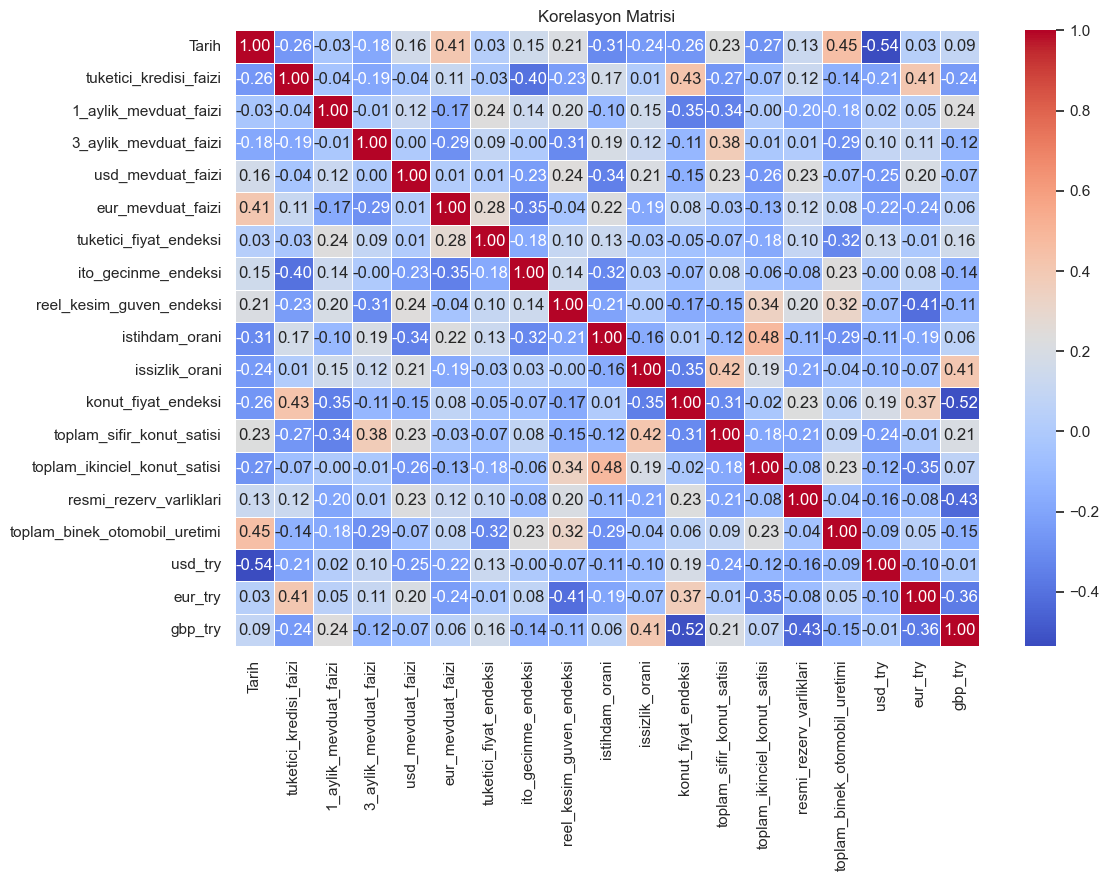

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplayalım
correlation_matrix = df.corr()

# Korelasyon matrisini ısı haritası (heatmap) olarak görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

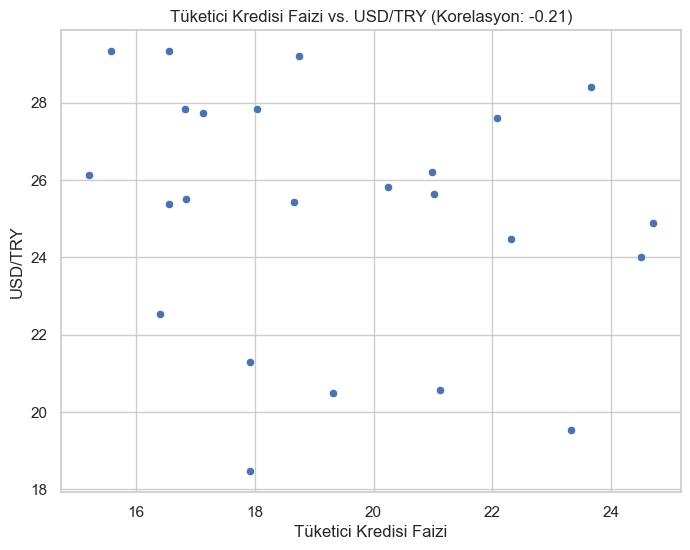

In [109]:
# Korelasyon hesaplaması
correlation = df['tuketici_kredisi_faizi'].corr(df['usd_try'])

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tuketici_kredisi_faizi'], y=df['usd_try'])

# Korelasyon katsayısını başlığa ekleme
plt.title(f'Tüketici Kredisi Faizi vs. USD/TRY (Korelasyon: {correlation:.2f})')
plt.xlabel('Tüketici Kredisi Faizi')
plt.ylabel('USD/TRY')
plt.show()


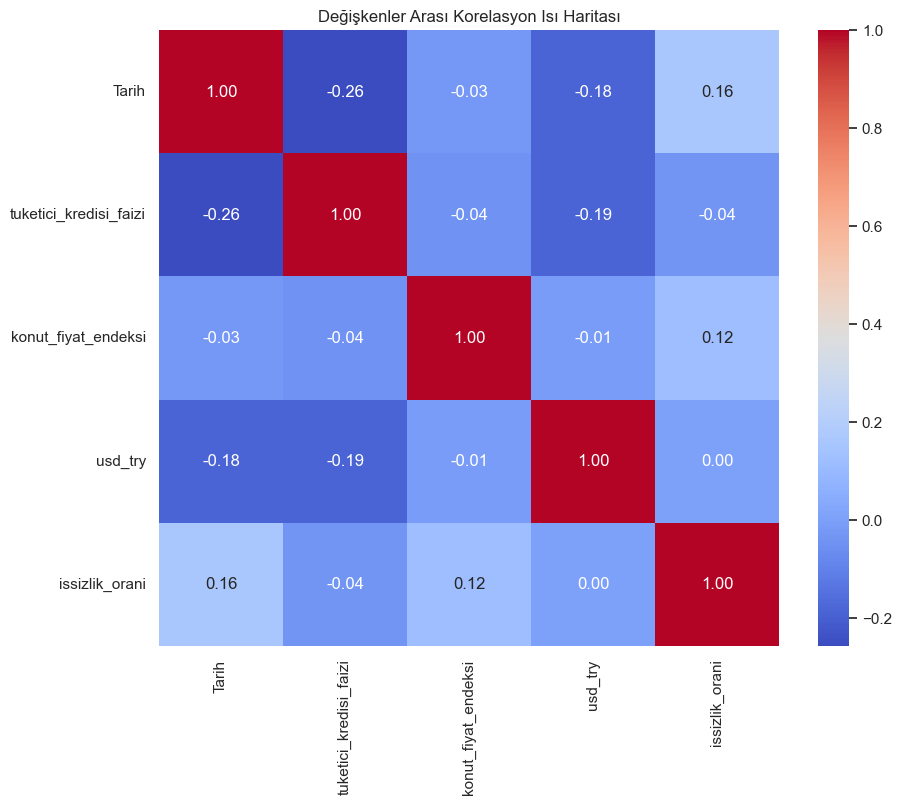

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası Korelasyon Isı Haritası")
plt.show()

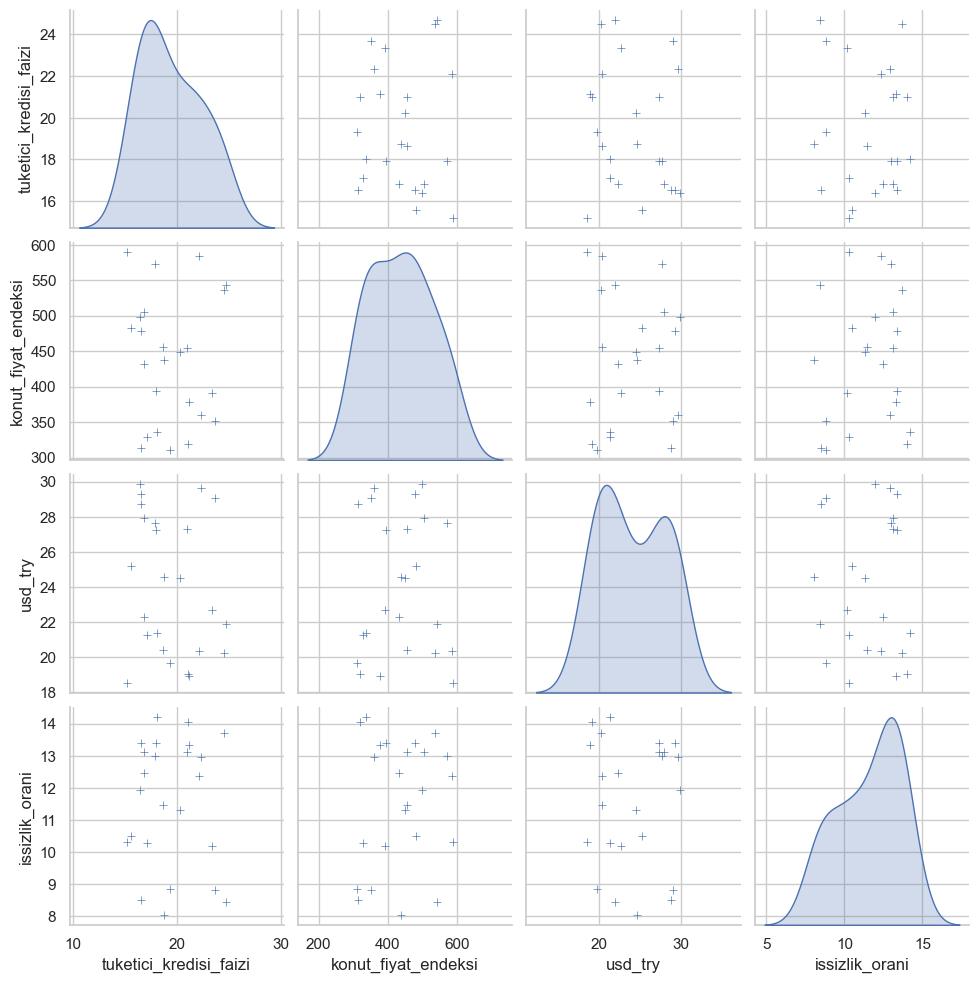

In [18]:
sns.pairplot(df, diag_kind='kde', markers='+')
plt.show()

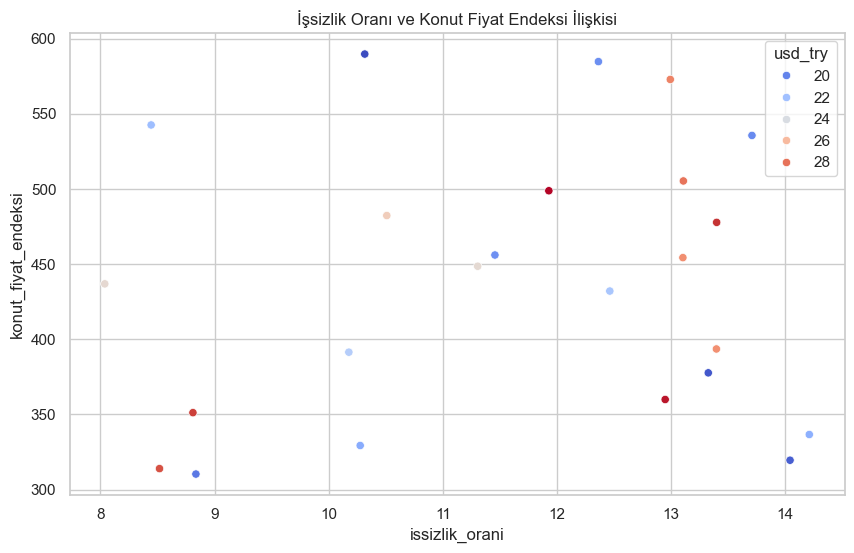

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="issizlik_orani", y="konut_fiyat_endeksi", hue="usd_try", palette="coolwarm")
plt.title("İşsizlik Oranı ve Konut Fiyat Endeksi İlişkisi")
plt.show()

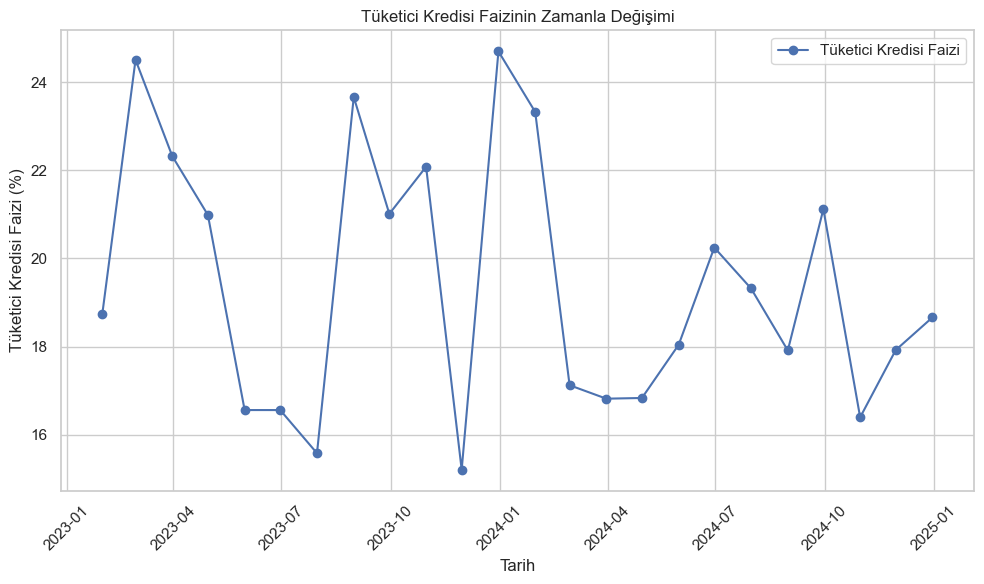

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['Tarih'], df['tuketici_kredisi_faizi'], color='b', marker='o', linestyle='-', label='Tüketici Kredisi Faizi')
plt.xlabel('Tarih')
plt.ylabel('Tüketici Kredisi Faizi (%)')
plt.title('Tüketici Kredisi Faizinin Zamanla Değişimi')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()